# Libraries

In [ ]:
!pip install pandas
!pip install sodapy

In [ ]:
from sodapy import Socrata
import numpy as np
import pandas as pd
from scipy import stats

# Data

In [ ]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("7x5e-2fxh", limit=2000) #feel free to unlimit this if you'd like. 2000 is sufficient for the hackathon (if not doing ML)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

results_df = results_df.replace('Not Available', np.nan)

In [ ]:
# drop extraneous columns

# Define the columns to subset based on the categories provided
location_data_columns = ['property_id', 'latitude', 'longitude', 'borough', 'nta']

property_use_details_columns = [
    'primary_property_type',
    'largest_property_use_type',
    'largest_property_use_type_1',
    '_2nd_largest_property_use',
    '_2nd_largest_property_use_1',
    '_3rd_largest_property_use',
    'year_built',
    'construction_status',
    'number_of_buildings',
    'occupancy',
    'metered_areas_energy',
    'metered_areas_water',
    '_3rd_largest_property_use_1',
    'national_median_reference',
    'property_gfa_calculated_1',
    'last_modified_date_property',
    'last_modified_date_electric',
    'last_modified_date_gas_meters',
    'last_modified_date_non',
    'last_modified_date_water',
    'last_modified_date_property_1'
]

energy_use_metrics_columns = [
    'reason_s_for_no_score',
    'energy_star_score',
    'energy_star_certification',
    'energy_star_certification_1',
    'site_eui_kbtu_ft',
    'weather_normalized_site_eui',
    'national_median_site_eui',
    'site_energy_use_kbtu',
    'weather_normalized_site_energy',
    'weather_normalized_site',
    'weather_normalized_site_1',
    'source_eui_kbtu_ft',
    'weather_normalized_source',
    'national_median_source_eui',
    'source_energy_use_kbtu',
    'weather_normalized_source_1',
    'fuel_oil_1_use_kbtu',
    'fuel_oil_2_use_kbtu',
    'fuel_oil_4_use_kbtu',
    'fuel_oil_5_6_use_kbtu',
    'diesel_2_use_kbtu',
    'propane_use_kbtu',
    'district_steam_use_kbtu',
    'district_hot_water_use_kbtu',
    'district_chilled_water_use',
    'natural_gas_use_kbtu',
    'natural_gas_use_therms',
    'weather_normalized_site_2',
    'electricity_use_grid_purchase',
    'electricity_use_grid_purchase_1',
    'weather_normalized_site_3',
    'electricity_use_grid_purchase_2',
    'electricity_use_grid_purchase_3',
    'electricity_use_generated',
    'electricity_use_generated_1',
    'electricity_use_generated_2',
    'electricity_use_generated_3',
    'annual_maximum_demand_kw',
    'annual_maximum_demand_mm',
    'annual_maximum_demand_meter',
    'green_power_onsite_kwh',
    'green_power_offsite_kwh',
    'green_power_onsite_and_offsite',
    'total_ghg_emissions_metric',
    'direct_ghg_emissions_metric',
    'total_ghg_emissions_intensity',
    'direct_ghg_emissions_intensity',
    'indirect_ghg_emissions_metric',
    'net_emissions_metric_tons',
    'indirect_ghg_emissions',
    'national_median_total_ghg',
    'egrid_output_emissions_rate',
    'avoided_emissions_onsite',
    'avoided_emissions_offsite',
    'avoided_emissions_onsite_1',
    'percent_of_recs_retained',
    'percent_of_total_electricity',
    'water_use_all_water_sources',
    'municipally_supplied_potable',
    'municipally_supplied_potable_1',
    'municipally_supplied_potable_2',
    'municipally_supplied_potable_3'
]
data_quality_columns = [
    'estimated_data_flag',
    'estimated_data_flag_natural',
    'estimated_data_flag_fuel',
    'estimated_data_flag_fuel_1',
    'estimated_data_flag_fuel_2',
    'estimated_data_flag_fuel_3',
    'estimated_data_flag_district',
    'estimated_data_flag_1',
    'estimated_values_energy',
    'estimated_values_water',
    'alert_data_center_issue_with',
    'alert_energy_meter_has_less',
    'alert_energy_meter_has_gaps',
    'alert_energy_meter_has',
    'alert_energy_no_meters',
    'alert_energy_meter_has_single',
    'alert_water_meter_has_less',
    'alert_property_has_no_uses'
]

# Combine all columns into a single list
all_subset_columns = location_data_columns + property_use_details_columns + energy_use_metrics_columns + data_quality_columns

# Subset the dataframe based on these columns
df = results_df[all_subset_columns]

# Show the first few rows of the subsetted dataframe



In [ ]:
# convert to Nan

df = df.replace('Not Available', np.nan)

In [ ]:
# filter for whole metered

df = df.loc[df['metered_areas_water'] == 'Whole Property']
df = df.loc[df['metered_areas_energy'] == 'Whole Property']
df = df.loc[df['construction_status'] == 'Existing']

In [ ]:
df

,property_id,latitude,longitude,borough,nta,primary_property_type,largest_property_use_type,largest_property_use_type_1,_2nd_largest_property_use,_2nd_largest_property_use_1,...,estimated_values_energy,estimated_values_water,alert_data_center_issue_with,alert_energy_meter_has_less,alert_energy_meter_has_gaps,alert_energy_meter_has,alert_energy_no_meters,alert_energy_meter_has_single,alert_water_meter_has_less,alert_property_has_no_uses
0,21205224,40.769272,-73.913633,QUEENS,Astoria,Multifamily Housing,Multifamily Housing,25000,Parking,9146,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
1,2665352,40.790503,-73.96792,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,260780,Office,1200,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
2,2665400,40.792758,-73.965171,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,324378,Parking,29750,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
3,2665405,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,1039841,Parking,233000,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
4,2665415,40.823008,-73.95067,MANHATTAN,Hamilton Heights,Multifamily Housing,Multifamily Housing,72662,NaN,NaN,...,No,No,Ok,Ok,Ok,Ok,Ok,Possible Issue,Ok,Ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,6275883,40.693963,-73.992561,BROOKLYN,Brooklyn Heights-Cobble Hill,Multifamily Housing,Multifamily Housing,88941,Retail Store,11719,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
1985,14719028,40.782735,-73.977327,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,94659,NaN,NaN,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
1997,21967832,40.754847,-73.987833,MANHATTAN,Midtown-Midtown South,Hotel,Hotel,179000,Heated Swimming Pool,0,...,Yes,Yes,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok
1998,21897298,40.759665,-73.841232,QUEENS,park-cemetery-etc-Queens,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,109200,Parking,0,...,No,No,Ok,Ok,Ok,Ok,Ok,Ok,Ok,Ok


In [ ]:
df = df.loc[df['alert_energy_meter_has_less'] == 'Ok']
df = df.loc[df['alert_energy_meter_has_gaps'] == 'Ok']
df = df.loc[df['alert_water_meter_has_less'] == 'Ok']
df = df.loc[df['alert_energy_no_meters'] == 'Ok']

df = df.drop(columns=['metered_areas_water', 'metered_areas_energy', 'construction_status', 'metered_areas_water', 'alert_energy_meter_has_less',
                      'alert_energy_meter_has_gaps', 'alert_water_meter_has_less', 'alert_energy_no_meters'])

df = df.dropna(subset = ['latitude', 'longitude', 'borough', 'nta'])

In [ ]:
len_df = df.shape[0]
for k, i in df.isna().sum().iteritems():
  if i/len_df > 0.9:
    print(k, i)

_3rd_largest_property_use 1235
_3rd_largest_property_use_1 1235
reason_s_for_no_score 1253
energy_star_certification 1343
fuel_oil_1_use_kbtu 1362
fuel_oil_4_use_kbtu 1276
fuel_oil_5_6_use_kbtu 1363
diesel_2_use_kbtu 1361
propane_use_kbtu 1364
district_steam_use_kbtu 1257
district_hot_water_use_kbtu 1364
district_chilled_water_use 1364
electricity_use_generated 1364
electricity_use_generated_1 1364
electricity_use_generated_2 1364
electricity_use_generated_3 1364
annual_maximum_demand_kw 1359
annual_maximum_demand_mm 1359
annual_maximum_demand_meter 1359
green_power_onsite_kwh 1364
avoided_emissions_onsite 1364
percent_of_recs_retained 1364
percent_of_total_electricity 1364
municipally_supplied_potable 1344
municipally_supplied_potable_3 1364
estimated_data_flag_fuel 1361
estimated_data_flag_district 1247
estimated_data_flag_1 1340


/var/folders/c4/p03rvxp56tj6r3n9wlwp3mxc0000gn/T/ipykernel_889/2908263710.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for k, i in df.isna().sum().iteritems():


In [ ]:
# Fill NaNs with zeros for the specified columns
fill_zero_columns = [
    'fuel_oil_1_use_kbtu', 'fuel_oil_4_use_kbtu', 'fuel_oil_5_6_use_kbtu',
    'diesel_2_use_kbtu', 'propane_use_kbtu', 'electricity_use_generated',
    'electricity_use_generated_1', 'electricity_use_generated_2', 'electricity_use_generated_3',
    'green_power_onsite_kwh', 'avoided_emissions_onsite', 'percent_of_recs_retained',
    'percent_of_total_electricity'
]
df[fill_zero_columns] = df[fill_zero_columns].fillna(0)

# Drop columns or observations where values are boolean-like
drop_columns = [
    '_3rd_largest_property_use', '_3rd_largest_property_use_1', 'energy_star_certification',
    'estimated_data_flag_district', 'estimated_data_flag_1', 'municipally_supplied_potable',
    'municipally_supplied_potable_3', 'district_steam_use_kbtu', 'district_hot_water_use_kbtu',
    'district_chilled_water_use', 'annual_maximum_demand_kw', 'annual_maximum_demand_mm',
    'annual_maximum_demand_meter', 'municipally_supplied_potable_1', 'municipally_supplied_potable_2'
]

# Drop observations based on specific conditions
df = df[df['estimated_data_flag_fuel'] != "Yes"]
df = df[df['estimated_data_flag_fuel_2'] != "Yes"]
df = df[df['estimated_data_flag_fuel_3'] != "Yes"]
df.drop(columns=drop_columns, inplace=True, errors='ignore')

df = df.drop(columns = [column for column in df.columns if 'alert' in column or 'estimated' in column])

# Drop observations based on specific conditions


df

,property_id,latitude,longitude,borough,nta,primary_property_type,largest_property_use_type,largest_property_use_type_1,_2nd_largest_property_use,_2nd_largest_property_use_1,...,net_emissions_metric_tons,indirect_ghg_emissions,national_median_total_ghg,egrid_output_emissions_rate,avoided_emissions_onsite,avoided_emissions_offsite,avoided_emissions_onsite_1,percent_of_recs_retained,percent_of_total_electricity,water_use_all_water_sources
0,21205224,40.769272,-73.913633,QUEENS,Astoria,Multifamily Housing,Multifamily Housing,25000,Parking,9146,...,107.5,2,122.7,84.5,0,0,0,0,0,910.8
1,2665352,40.790503,-73.96792,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,260780,Office,1200,...,398.6,1.4,945.9,84.5,0,0,0,0,0,12826.8
2,2665400,40.792758,-73.965171,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,324378,Parking,29750,...,1323,1.1,1721.6,84.5,0,0,0,0,0,16038
4,2665415,40.823008,-73.95067,MANHATTAN,Hamilton Heights,Multifamily Housing,Multifamily Housing,72662,NaN,NaN,...,483.4,1.5,404.8,84.5,0,0,0,0,0,7450.3
5,2665418,40.823978,-73.95223,MANHATTAN,Hamilton Heights,Multifamily Housing,Multifamily Housing,99110,NaN,NaN,...,544.8,1.5,573.6,84.5,0,0,0,0,0,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,6275883,40.693963,-73.992561,BROOKLYN,Brooklyn Heights-Cobble Hill,Multifamily Housing,Multifamily Housing,88941,Retail Store,11719,...,298.5,2.1,436.2,84.5,0,0,0,0,0,2186.2
1985,14719028,40.782735,-73.977327,MANHATTAN,Upper West Side,Multifamily Housing,Multifamily Housing,94659,NaN,NaN,...,435.9,1.1,534,84.5,0,0,0,0,0,6143.7
1997,21967832,40.754847,-73.987833,MANHATTAN,Midtown-Midtown South,Hotel,Hotel,179000,Heated Swimming Pool,0,...,840.7,3.9,1312.2,84.5,0,0,0,0,0,1481
1998,21897298,40.759665,-73.841232,QUEENS,park-cemetery-etc-Queens,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,109200,Parking,0,...,489.5,4.5,NaN,84.5,0,0,0,0,0,1018.8


In [ ]:
dropna_cols = [
    'weather_normalized_site_eui',
    'site_eui_kbtu_ft',
    'national_median_site_eui',
    'site_energy_use_kbtu',
    'weather_normalized_site_2',
    'weather_normalized_site_energy',
    'weather_normalized_site',
    'weather_normalized_site_1',
    'source_eui_kbtu_ft',
    'weather_normalized_source',
    'national_median_source_eui',
    'source_energy_use_kbtu',
    'weather_normalized_source_1',
    'electricity_use_grid_purchase',
    'electricity_use_grid_purchase_1',
    'weather_normalized_site_3',
    'electricity_use_grid_purchase_2',
    'electricity_use_grid_purchase_3',
    'green_power_offsite_kwh',
    'green_power_onsite_and_offsite',
    'total_ghg_emissions_metric',
    'direct_ghg_emissions_metric',
    'total_ghg_emissions_intensity',
    'direct_ghg_emissions_intensity',
    'indirect_ghg_emissions_metric',
    'net_emissions_metric_tons',
    'indirect_ghg_emissions',
    'national_median_total_ghg',
    'egrid_output_emissions_rate',
    'avoided_emissions_offsite',
    'avoided_emissions_onsite_1',
    'water_use_all_water_sources',
    'energy_star_score'
]

df.dropna(subset=dropna_cols, inplace=True)

# Drop specified columns
drop_cols = [
    'nta',
    'reason_s_for_no_score',
    '_2nd_largest_property_use_1',
    '_2nd_largest_property_use',
]

df.drop(columns=drop_cols, inplace=True)

# Fill NaNs with zero for specified columns
fillna_cols = [
    'natural_gas_use_kbtu',
    'natural_gas_use_therms',
    'fuel_oil_2_use_kbtu'
]

df[fillna_cols] = df[fillna_cols].fillna(0)

df



# dropna row
# weather_normalized_site_eui
# site_eui_kbtu_ft
# national_median_site_eui
# site_energy_use_kbtu
# weather_normalized_site_2
# weather_normalized_site_energy
# weather_normalized_site
# weather_normalized_site_1
# source_eui_kbtu_ft
# weather_normalized_source
# national_median_source_eui
# source_energy_use_kbtu
# weather_normalized_source_1
# electricity_use_grid_purchase
# electricity_use_grid_purchase_1
# weather_normalized_site_3
# electricity_use_grid_purchase_2
# electricity_use_grid_purchase_3
# green_power_offsite_kwh
# green_power_onsite_and_offsite
# total_ghg_emissions_metric
# direct_ghg_emissions_metric
# total_ghg_emissions_intensity
# direct_ghg_emissions_intensity
# indirect_ghg_emissions_metric
# net_emissions_metric_tons
# indirect_ghg_emissions
# national_median_total_ghg
# egrid_output_emissions_rate
# avoided_emissions_offsite
# avoided_emissions_onsite_1
# percent_of_electricity_that
# water_use_all_water_sources

# drop col
# percent_of_electricity_that
# reason_s_for_no_score

# fill na (0)
# natural_gas_use_kbtu
# natural_gas_use_therms
# fuel_oil_2_use_kbtu

,property_id,latitude,longitude,borough,primary_property_type,largest_property_use_type,largest_property_use_type_1,year_built,number_of_buildings,occupancy,...,net_emissions_metric_tons,indirect_ghg_emissions,national_median_total_ghg,egrid_output_emissions_rate,avoided_emissions_onsite,avoided_emissions_offsite,avoided_emissions_onsite_1,percent_of_recs_retained,percent_of_total_electricity,water_use_all_water_sources
0,21205224,40.769272,-73.913633,QUEENS,Multifamily Housing,Multifamily Housing,25000,2010,1,100,...,107.5,2,122.7,84.5,0,0,0,0,0,910.8
1,2665352,40.790503,-73.96792,MANHATTAN,Multifamily Housing,Multifamily Housing,260780,1970,1,100,...,398.6,1.4,945.9,84.5,0,0,0,0,0,12826.8
2,2665400,40.792758,-73.965171,MANHATTAN,Multifamily Housing,Multifamily Housing,324378,1943,1,100,...,1323,1.1,1721.6,84.5,0,0,0,0,0,16038
7,2665443,40.837333,-73.94006,MANHATTAN,Multifamily Housing,Multifamily Housing,52428,1958,1,100,...,356.7,1.4,339.8,84.5,0,0,0,0,0,4819.8
8,2665447,40.837275,-73.94423,MANHATTAN,Multifamily Housing,Multifamily Housing,70384,1973,1,100,...,379.6,1.1,458,84.5,0,0,0,0,0,7408.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,4095518,40.670965,-73.862535,BROOKLYN,Senior Living Community,Senior Living Community,42000,1975,1,100,...,662,3.7,696.7,84.5,0,0,0,0,0,4084.3
1981,22480734,40.692915,-73.98815,BROOKLYN,K-12 School,K-12 School,76200,1927,1,100,...,655.5,3.7,504.9,84.5,0,0,0,0,0,754.5
1983,6275883,40.693963,-73.992561,BROOKLYN,Multifamily Housing,Multifamily Housing,88941,2010,1,100,...,298.5,2.1,436.2,84.5,0,0,0,0,0,2186.2
1985,14719028,40.782735,-73.977327,MANHATTAN,Multifamily Housing,Multifamily Housing,94659,1924,1,100,...,435.9,1.1,534,84.5,0,0,0,0,0,6143.7


In [ ]:
cat_cols = [
    'primary_property_type',
    '_2nd_largest_property_use',
    '_3rd_largest_property_use',
    'metered_areas_energy',
    'metered_areas_water',
    #'national_median_reference',
    'borough',
    #'nta',
    'estimated_data_flag',
    'estimated_data_flag_natural',
    'estimated_data_flag_fuel',
    'estimated_data_flag_fuel_1',
    'estimated_data_flag_fuel_2',
    'estimated_data_flag_fuel_3',
    'estimated_data_flag_district',
    #'estimated_data_flag_1',
    'estimated_values_energy',
    'estimated_values_water',
    'alert_data_center_issue_with',
    'alert_energy_meter_has_less',
    'alert_energy_meter_has_gaps',
    'alert_energy_meter_has',
    'alert_energy_no_meters',
    'alert_energy_meter_has_single',
    'alert_water_meter_has_less',
    'alert_property_has_no_uses'
]

num_cols = [
    'largest_property_use_type_1',
    'year_built',
    'number_of_buildings',
    'occupancy',
    #'_3rd_largest_property_use_1',
    'property_gfa_calculated_1',

    "energy_star_score",

    'site_eui_kbtu_ft',
    'weather_normalized_site_eui',
    #'national_median_site_eui',
    'site_energy_use_kbtu',
    'weather_normalized_site_energy',
    'weather_normalized_site',
    #'weather_normalized_site_1',
    'source_eui_kbtu_ft',
    'weather_normalized_source',
    'national_median_source_eui',
    'source_energy_use_kbtu',
    #'weather_normalized_source_1',
    'fuel_oil_1_use_kbtu',
    #'fuel_oil_2_use_kbtu',
    #'fuel_oil_4_use_kbtu',
    #'fuel_oil_5_6_use_kbtu',
    #'diesel_2_use_kbtu',
    'propane_use_kbtu',
    'district_steam_use_kbtu',
    'district_hot_water_use_kbtu',
    'district_chilled_water_use',
    'natural_gas_use_kbtu',
    'natural_gas_use_therms',
    #'weather_normalized_site_2',
    'electricity_use_grid_purchase',
    'electricity_use_grid_purchase_1',
    #'weather_normalized_site_3',
    #'electricity_use_grid_purchase_2',
    #'electricity_use_grid_purchase_3',
    'electricity_use_generated',
    'electricity_use_generated_1',
    #'electricity_use_generated_2',
    #'electricity_use_generated_3',
    'green_power_onsite_kwh',
    'green_power_offsite_kwh',
    'green_power_onsite_and_offsite',
    #'total_ghg_emissions_metric',
    #'direct_ghg_emissions_metric',
    'total_ghg_emissions_intensity',
    #'direct_ghg_emissions_intensity',
    #'indirect_ghg_emissions_metric',
    #'net_emissions_metric_tons',
    #'indirect_ghg_emissions',
    #'national_median_total_ghg',
    'egrid_output_emissions_rate',
    'avoided_emissions_onsite',
    'avoided_emissions_offsite',
    #'avoided_emissions_onsite_1',
    'percent_of_electricity_that',
    'percent_of_recs_retained',
    'percent_of_total_electricity',
    'water_use_all_water_sources',
    'municipally_supplied_potable',
    #'municipally_supplied_potable_1',
    #'municipally_supplied_potable_2',
    #'municipally_supplied_potable_3'
]

other_cols = [
    'reason_s_for_no_score',
    'energy_star_certification',
    'energy_star_certification_1',
    'annual_maximum_demand_kw',
    'annual_maximum_demand_mm',
    'annual_maximum_demand_meter',
]

date_cols = [
    'last_modified_date_property',
    'last_modified_date_electric',
    'last_modified_date_gas_meters',
    'last_modified_date_non',
    'last_modified_date_water',
    'last_modified_date_property_1'
]

In [ ]:
cat_cols = list(set(cat_cols).intersection(df.columns))
num_cols = list(set(num_cols).intersection(df.columns))
other_cols = list(set(other_cols).intersection(df.columns))
date_cols = list(set(date_cols).intersection(df.columns))

In [ ]:
def cat2dummy():
    _df = pd.DataFrame()
    for _col in cat_cols:
        _df = pd.concat([
            _df,
            pd.get_dummies(df[[_col]].fillna("nan")).iloc[:, :-1]
        ], axis=1)
    return _df

In [ ]:
drop = cat2dummy().sum() / len(df)
assert sum(drop == 1) == 0

In [ ]:
for _col in num_cols:
    try:
        df[_col].astype(np.float64)
    except:
        print(_col)

In [ ]:
X_num = df[num_cols]
X_cat = cat2dummy()

y = X_num["total_ghg_emissions_intensity"].astype(np.float64)
X_num = X_num.drop(columns="total_ghg_emissions_intensity")

for col in X_num.columns:
  try:
    X_num[col] = X_num[col].astype(np.float64)
  except:
    X_num.drop(columns=[col], inplace=True)

X = pd.concat([X_num, X_cat], axis=1)

In [ ]:
X.shape, X_num.shape, X_cat.shape, y.shape

((1098, 49), (1098, 32), (1098, 17), (1098,))

In [ ]:
#X_num.to_csv("X_num.csv", index=False)
#X_cat.to_csv("X_cat.csv", index=False)
#y.to_csv("y.csv", index=False)

In [ ]:
import pymc as pm
import arviz as az

In [ ]:
# coords = {"observation": range(X.shape[0]), "covariate": range(X.shape[1])}

with pm.Model() as BayesModel:

    #λ = pm.HalfCauchy('lambda', beta=1, size=(X.shape[1], 1))
    #τ = pm.HalfCauchy('tau', beta=1)
    #κ = pm.Deterministic('shrinkage', τ*τ*λ*λ)
    beta1 = pm.Laplace("beta1", mu=0, b=1, size=(X.shape[1],1))
    #beta1 = pm.Normal("beta1", mu=0, sigma=1, size=(X.shape[1],1))

    beta0 = pm.Normal("beta0", mu=0, sigma=1)

    mu = beta0 + pm.math.dot(X.astype(np.float64).values, beta1)

    # likelihood
    sigma_hier = pm.Exponential("sigma_sigma", 1)
    sigma = pm.Exponential("sigma", sigma_hier)
    z = pm.Normal.dist(mu=mu, sigma=sigma)
    obs = pm.Truncated("obs", z, lower=0, upper=None,
                       observed=y.values.reshape(-1,1),
                       size=(X.shape[0],1))

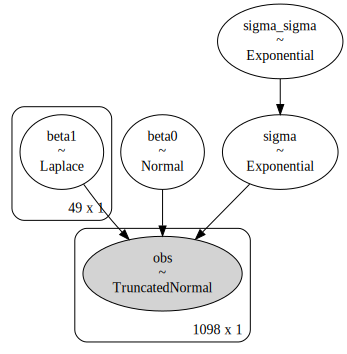

In [ ]:
pm.model_to_graphviz(BayesModel)

In [ ]:
with BayesModel:
    chain = pm.sample(10000, tune=5000, chains=1)

In [ ]:
chain.sample_stats.acceptance_rate.mean()

<xarray.DataArray 'acceptance_rate' ()>
array(0.75245257)

array([[<Axes: title={'center': 'beta1'}>,
        <Axes: title={'center': 'beta1'}>],
       [<Axes: title={'center': 'beta0'}>,
        <Axes: title={'center': 'beta0'}>],
       [<Axes: title={'center': 'sigma_sigma'}>,
        <Axes: title={'center': 'sigma_sigma'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

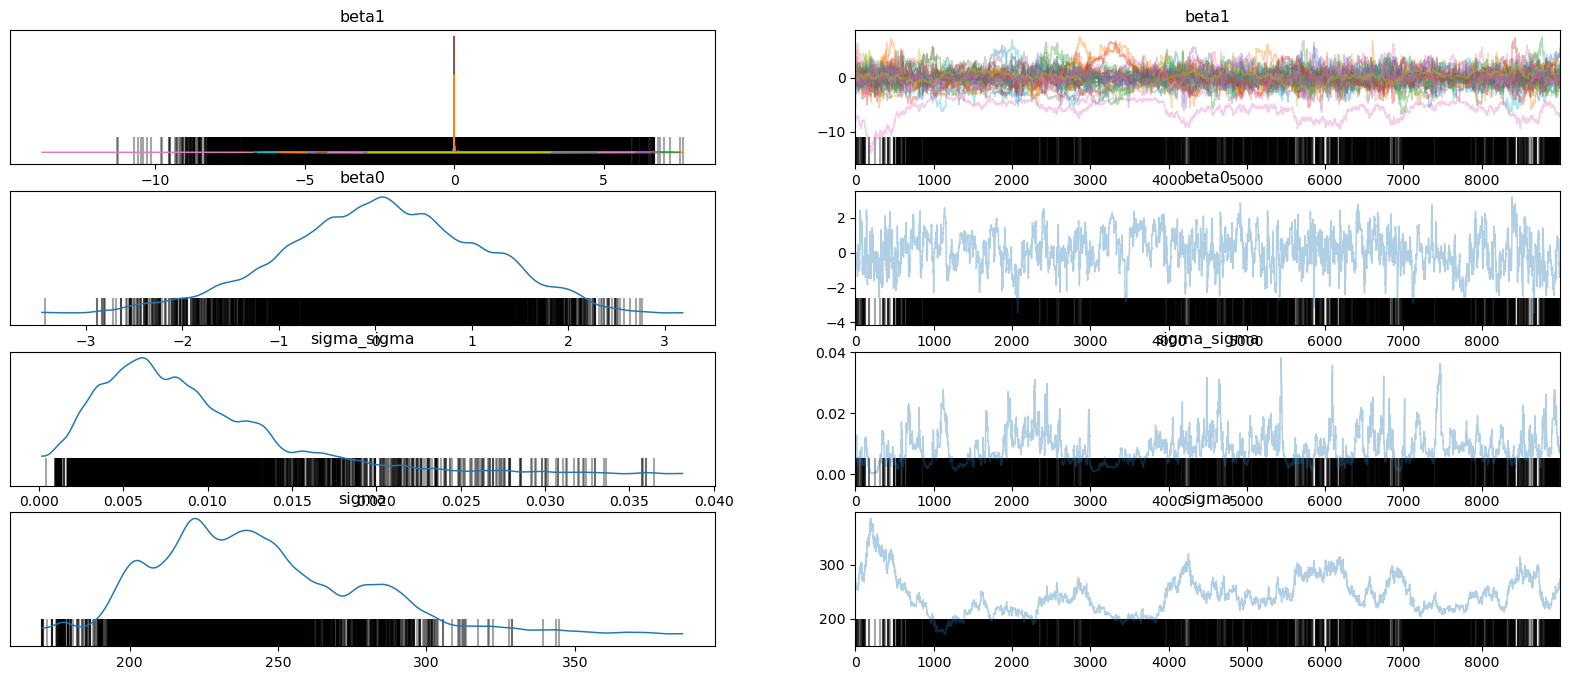

In [ ]:
az.plot_trace(chain, figsize=(20,8))

In [ ]:
beta0_df = pd.Series(chain.posterior.beta0.values[0,::5])
beta1_df = pd.DataFrame(
    chain.posterior.beta1.values[0,::5,:,0], columns=X.columns
)
sigma_df = pd.Series(chain.posterior.sigma.values[0,::5])

In [ ]:
_df = beta1_df.describe().transpose().sort_values("mean", ascending=True).round(2).iloc[:15]
_df[_df["std"] > 0]

,count,mean,std,min,25%,50%,75%,max
year_built,1800.0,-5.91,1.67,-13.60,-6.76,-5.57,-4.70,-2.79
natural_gas_use_therms,1800.0,-1.44,0.93,-3.79,-2.16,-1.22,-0.73,0.71
energy_star_score,1800.0,-0.78,1.37,-6.27,-1.59,-0.57,0.06,3.60
primary_property_type_Medical Office,1800.0,-0.67,1.51,-4.47,-1.70,-0.37,0.41,2.64
electricity_use_generated,1800.0,-0.41,1.18,-3.62,-1.22,-0.36,0.34,3.67
electricity_use_grid_purchase_1,1800.0,-0.34,0.17,-0.65,-0.46,-0.39,-0.22,0.07
primary_property_type_Non-Refrigerated Warehouse,1800.0,-0.31,1.51,-6.55,-1.07,-0.14,0.57,3.74
primary_property_type_Financial Office,1800.0,-0.30,1.38,-5.00,-1.12,-0.21,0.36,4.93
primary_property_type_K-12 School,1800.0,-0.23,1.39,-5.04,-0.96,-0.06,0.65,3.18
primary_property_type_Multifamily Housing,1800.0,-0.19,0.70,-2.68,-0.64,-0.11,0.36,1.29


In [ ]:
_df = beta1_df.describe().transpose().sort_values("mean", ascending=False).round(2).iloc[:15]
_df[_df["std"] > 0]

,count,mean,std,min,25%,50%,75%,max
weather_normalized_source,1800.0,0.94,1.37,-4.44,0.02,0.73,1.72,6.22
source_eui_kbtu_ft,1800.0,0.85,1.32,-3.35,-0.06,0.59,1.59,7.15
number_of_buildings,1800.0,0.63,2.13,-4.12,-0.71,0.18,1.54,7.26
borough_MANHATTAN,1800.0,0.60,1.37,-3.01,-0.31,0.42,1.47,4.75
propane_use_kbtu,1800.0,0.33,1.38,-5.17,-0.50,0.14,0.99,6.21
primary_property_type_Residence Hall/Dormitory,1800.0,0.26,1.72,-5.88,-0.68,0.03,0.96,6.18
primary_property_type_Senior Living Community,1800.0,0.25,1.60,-3.57,-0.67,0.05,0.89,6.66
occupancy,1800.0,0.24,1.24,-3.50,-0.43,0.10,0.83,5.58
borough_BROOKLYN,1800.0,0.18,1.33,-4.15,-0.54,0.08,0.84,6.04
site_eui_kbtu_ft,1800.0,0.14,0.83,-1.98,-0.32,0.14,0.62,3.52


In [ ]:
_df = beta1_df.abs().describe().transpose().sort_values("mean").round(2).iloc[:15]
_df[_df["std"] > 0]

,count,mean,std,min,25%,50%,75%,max
fuel_oil_1_use_kbtu,1800.0,0.01,0.01,0.0,0.00,0.01,0.01,0.04
largest_property_use_type_1,1800.0,0.01,0.01,0.0,0.00,0.01,0.01,0.07
natural_gas_use_kbtu,1800.0,0.01,0.01,0.0,0.01,0.01,0.02,0.04
property_gfa_calculated_1,1800.0,0.04,0.02,0.0,0.03,0.03,0.05,0.11
electricity_use_grid_purchase,1800.0,0.10,0.05,0.0,0.07,0.12,0.14,0.19
water_use_all_water_sources,1800.0,0.13,0.08,0.0,0.08,0.12,0.18,0.42
electricity_use_grid_purchase_1,1800.0,0.34,0.17,0.0,0.22,0.39,0.46,0.65
green_power_onsite_and_offsite,1800.0,0.45,0.37,0.0,0.16,0.34,0.72,1.83
green_power_offsite_kwh,1800.0,0.46,0.37,0.0,0.16,0.36,0.72,1.84
primary_property_type_Multifamily Housing,1800.0,0.56,0.47,0.0,0.23,0.47,0.77,2.68


<Axes: >

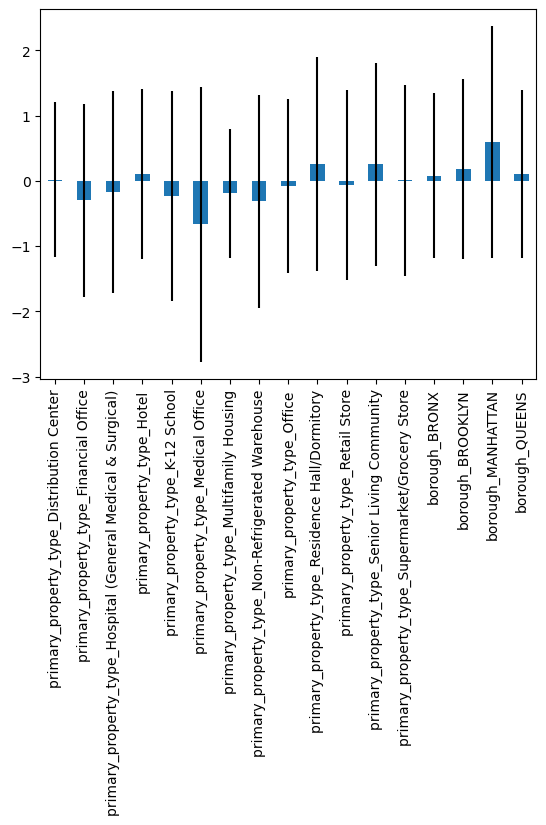

In [ ]:
beta1_df.iloc[:, -X_cat.shape[1]:].mean(axis=0).plot.bar(
    yerr=beta1_df.iloc[:, -X_cat.shape[1]:].quantile([0.25, 0.75]).diff(1).iloc[-1]
)

<Axes: >

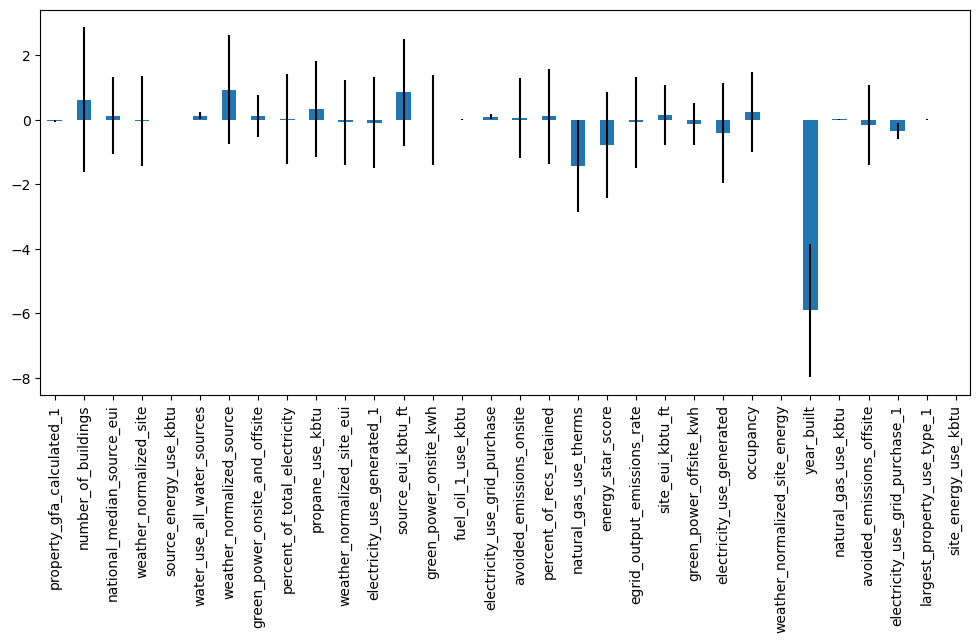

In [ ]:
beta1_df.iloc[:, :X_num.shape[1]].mean(axis=0).plot.bar(
    yerr=beta1_df.iloc[:, :X_num.shape[1]].quantile([0.25, 0.75]).diff(1).iloc[-1],
    figsize=(12,5)
)

In [ ]:
len(y)

1098

In [ ]:
lpdf = np.zeros(len(y))
for r in range(len(sigma_df)):
    sigma_r = sigma_df.iloc[r]
    mu_r = beta0_df.iloc[r] + X.dot(beta1_df.iloc[r,:])
    lpdf += stats.truncnorm.logpdf(y, a=0, b=np.inf, loc=mu_r, scale=sigma_r)
lpdf /= len(sigma_df)

In [ ]:
low_lpdf_index = pd.Series(lpdf).sort_values(ascending=True).index

In [ ]:
with BayesModel:
    pp = pm.sample_posterior_predictive(chain, extend_inferencedata=False)

In [ ]:
pp = pp.posterior_predictive.obs.values[0,::5,:,0]

In [ ]:
(y - pp.mean(axis=0)).iloc[low_lpdf_index[:20]]

1209    -2.861589
102    -49.818757
1519     0.121801
316    -16.175485
1735   -12.131032
1737    -0.975003
1739    -2.494696
261     -1.258768
185    -11.570855
1857    -2.092551
449    -12.417787
1885     2.631719
260     -0.269772
1858    -0.087135
1423    -1.369100
1741    -0.741976
143      1.580563
1516     2.560012
379      0.722497
1968     0.884111
Name: total_ghg_emissions_intensity, dtype: float64

In [ ]:
df.loc[[1209, 102]].transpose().iloc[:50]

,1209,102
property_id,20474435,7530286
latitude,40.747826,40.77105
longitude,-73.987101,-73.949647
borough,MANHATTAN,MANHATTAN
primary_property_type,Office,Multifamily Housing
largest_property_use_type,Office,Multifamily Housing
largest_property_use_type_1,54118,44364
year_built,2013,1911
number_of_buildings,1,1
occupancy,60,100


In [ ]:
df.loc[[143, 1885]].transpose().iloc[:50]

,143,1885
property_id,9297463,16090085
latitude,40.734997,40.579782
longitude,-73.866231,-73.970866
borough,QUEENS,BROOKLYN
primary_property_type,Multifamily Housing,Multifamily Housing
largest_property_use_type,Multifamily Housing,Multifamily Housing
largest_property_use_type_1,699956,1738656
year_built,1961,1964
number_of_buildings,8,3
occupancy,90,100


In [ ]:
pd.DataFrame(chain.posterior.beta1.values[0,:,:,0]).to_csv('beta1.csv', index=False)
pd.DataFrame(chain.posterior.beta0.values[0,:]).to_csv('beta0.csv', index=False)
pd.DataFrame(chain.posterior.sigma.values[0,:]).to_csv('sigma.csv', index=False)